# Phys555 Assignment 2 Question 3
Karlee Zammit - V00823093

# Linear Regression and KNN

Q3- Use the Q1 regression data set for the following: 
Perform a PCA and use the first (N) best components that contain ~90% of the information. Then, repeat Q2 (A and B) with the first N components and compare the performances/plots with Q2. 
Bonus: Repeat the same steps with 50% and 70% information and compare the three cases (i.e., 50%, 70% and 90%). Add a discussion and conclusion. 

## Introduction

For my dataset (Sachs Harbour), I was not able to do 50%, 70%, and 90%, as the first principal component makes up for approximately 60% of the data. PCA always keeps the first component, and so I shifted the bonus percentages to 90%, 80%, and 72% to be able to continue with the bonus (it crashed for anything below 72%).

In [1]:
# Import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
print('Done!')

Done!


## Functions

### Linear Regression

In [2]:
# Use the same linear regression model as in Q2 so the results are comparable, for the data keeping only n_components 
def linear_regression(max_iter, eta0, X_tr, X_va, Y_tr, Y_va, xlim, ylim, textx, texty, text2x, text2y, plot):
    reg = linear_model.SGDRegressor(loss='squared_error', penalty='L2', alpha=0.0001,
                                   max_iter=max_iter, eta0=eta0, tol=0.0001, learning_rate='adaptive', n_iter_no_change=3)

    # Fit the model on the PCA data
    reg.fit(X_tr,Y_tr)  # fit the model with training set

    #'predictions for training and validation sets'
    Y_tr_pred = reg.predict(X_tr)  
    Y_va_pred = reg.predict(X_va)

    #Statistical information regarding training and validation predictions
    mu = np.mean(Y_tr-Y_tr_pred)
    median = np.median(Y_tr-Y_tr_pred)
    sigma = np.std(Y_tr-Y_tr_pred)

    muv = np.mean(Y_va-Y_va_pred)
    medianv = np.median(Y_va-Y_va_pred)
    sigmav = np.std(Y_va-Y_va_pred)

    textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
    textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)
    
    if plot == 1:
        
        plt.figure(1)
        plt.plot(Y_tr,Y_tr_pred,'ob')
        plt.plot(Y_va,Y_va_pred,'.r')

        plt.plot(np.arange(xlim,ylim,.1),  np.arange(xlim,ylim,.1),'-k')
        plt.xlabel('X')
        plt.ylabel('Predicted X')
        plt.legend(['Training', 'Validation'], loc='best')
        # plt.xlim([0,2])
        # plt.ylim([0,2])

        plt.text(textx,texty,textstr, color='b',fontsize=15)
        plt.text(text2x,text2y,textstrv, color='r',fontsize=15)
        plt.title('Linear Regression')

        plt.figure(2)
        plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',density=True,label='training')
        plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',density=True,label='validation')
        plt.xlabel('Predicted - real')
        plt.ylabel('Probability (density)')
        plt.legend(loc='upper left')

        plt.figure(3)
        plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
        plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
        plt.xlabel('Y (real)')
        plt.ylabel('Y (predicted) - Y (real)')
        plt.plot([xlim,ylim],[0,0],'y')
        plt.legend(loc='best')
    
    return mu, median, sigma, muv, medianv, sigmav

### KNN

In [3]:
def nearest_neighbour(nn, X_tr, X_va, Y_tr, Y_va, xlim, ylim, textx, texty, text2x, text2y, plot):    
    KNN = KNeighborsRegressor(n_neighbors=nn, weights='uniform')  # set the hyperparameters
    KNN.fit(X_tr,Y_tr)  # train it

    #'predictions for training and validation sets'
    Y_tr_pred= KNN.predict(X_tr)  
    Y_va_pred= KNN.predict(X_va)

    #Statistical information regarding training and validation predictions
    mu = np.mean(Y_tr-Y_tr_pred)
    median = np.median(Y_tr-Y_tr_pred)
    sigma = np.std(Y_tr-Y_tr_pred)

    muv = np.mean(Y_va-Y_va_pred)
    medianv = np.median(Y_va-Y_va_pred)
    sigmav = np.std(Y_va-Y_va_pred)

    textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
    textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)
    
    if plot == 1:
        
        plt.figure(1)
        plt.plot(Y_tr,Y_tr_pred,'ob')
        plt.plot(Y_va,Y_va_pred,'.r')

        plt.plot(np.arange(xlim,ylim,.1),  np.arange(xlim,ylim,.1),'-k')
        plt.xlabel('X')
        plt.ylabel('Predicted X')
        plt.legend(['Training', 'Validation'])
    
        plt.text(textx,texty,textstr, color='b',fontsize=15)
        plt.text(text2x,text2y,textstrv, color='r',fontsize=15)
        plt.title('KNN Regression: ' + str(nn) + ' NN')

        plt.figure(2)
        plt.hist(Y_tr_pred-Y_tr,20,color='b',histtype='step',density=True,label='training')
        plt.hist(Y_va_pred-Y_va,20,color='r',histtype='step',density=True,label='validation')
        plt.xlabel('Predicted - real')
        plt.ylabel('Probability (density)')
        plt.legend(loc='best')

        plt.figure(3)
        plt.scatter(Y_tr,Y_tr_pred-Y_tr,label='training',color='b',alpha=.3)
        plt.scatter(Y_va,Y_va_pred-Y_va,label='test',color='r',alpha=.3)
        plt.xlabel('Y (real)')
        plt.ylabel('Y (predicted) - Y (real)')
        plt.plot([xlim,ylim],[0,0],'y')
        plt.legend(loc='best')
    
    return mu, median, sigma, muv, medianv, sigmav
    

### Split and Normalize Data, Perform PCA

In [4]:
def split_data(X,Y, pca_comps):
    # Split the input and target data into test and train, with 75% of the data going to training, and 25% of the data going to testing
    X_tr, X_va, Y_tr, Y_va = train_test_split(X,Y.values.ravel(),test_size=0.25)

    # Print the shape of the split data
    print ('training set == ',np.shape(X_tr),np.shape(Y_tr),',, validation set == ', np.shape(X_va),np.shape(Y_va))
    
    # Normalize the data, as was done in Q2
    scaler_S= StandardScaler().fit(X_tr)  # line #2
    X_tr_Norm= scaler_S.transform(X_tr) # line # 3
    X_va_Norm= scaler_S.transform(X_va)  # Line #4

    # Perform PCA on the normalized data, keeping the number of components corresponding to the decimal percentage in n_components
    pca = PCA(n_components=pca_comps)
    X_tr_pca = pca.fit_transform(X_tr_Norm)
    X_va_pca = pca.fit_transform(X_va_Norm)
    
    return X_tr_Norm, X_va_Norm, X_tr_pca, X_va_pca, Y_tr, Y_va

# Sachs Harbour: Linear Regression

In [5]:
# Read in the data
df_SH = pd.read_excel('Ambient Sound Data Sachs Harbour 2015-2016.xlsx')
df_SH = df_SH.drop(['Deployment', 'Year', 'Month', 'Day', 'Hour', 'DateTime', 'Ice'], axis=1)
df_SH=df_SH.dropna(axis=0)

# Set temperature as the target variable
var = ['Temperature']

# Drop temperature out of the weather data, and set it as X
X = df_SH.loc[:,df_SH.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = df_SH[var].copy()
print(Y.columns)

Index(['10-100Hz', '100-1000Hz', '1-10kHz', '10-24kHz', '250Hz', '50-1000Hz',
       'DewPt', 'RelHum', 'WindDir', 'WindSp', 'Pressure', 'Ice6km2',
       'Ice19km2', 'Ice31km2', 'Ice106km2'],
      dtype='object')
Index(['Temperature'], dtype='object')


## Comparison of 90% Information vs. All Information

In [6]:
X_tr_Norm, X_va_Norm, X_tr_pca, X_va_pca, Y_tr, Y_va = split_data(X, Y, pca_comps=0.9)

training set ==  (7231, 15) (7231,) ,, validation set ==  (2411, 15) (2411,)


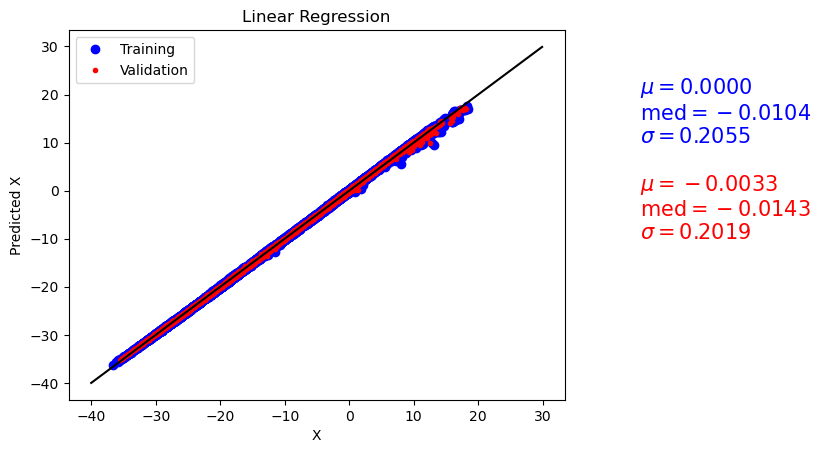

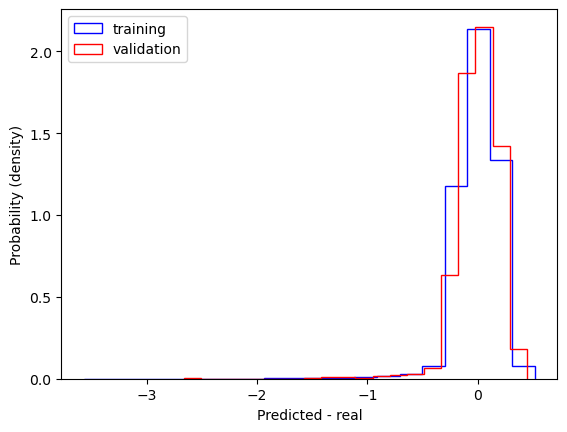

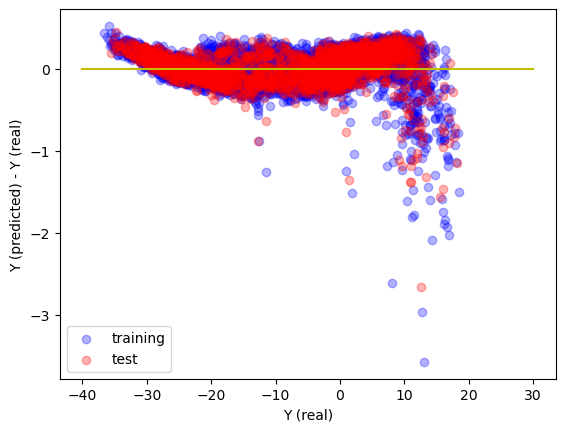

In [7]:
# All Components
mu, median, sigma, muv, medianv, sigmav = linear_regression(40, 0.001, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

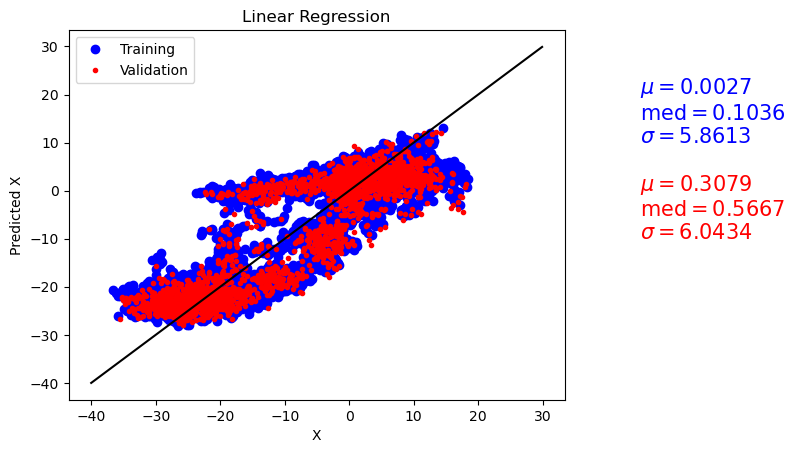

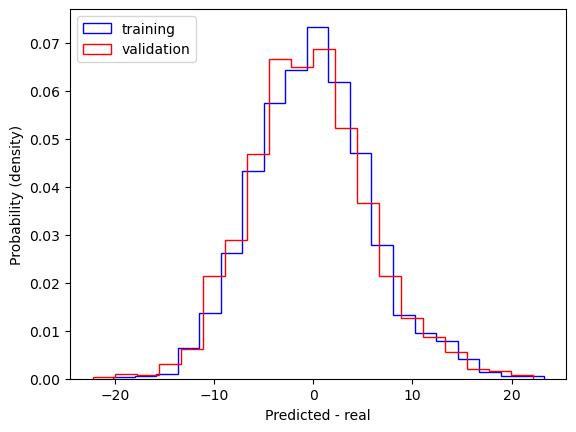

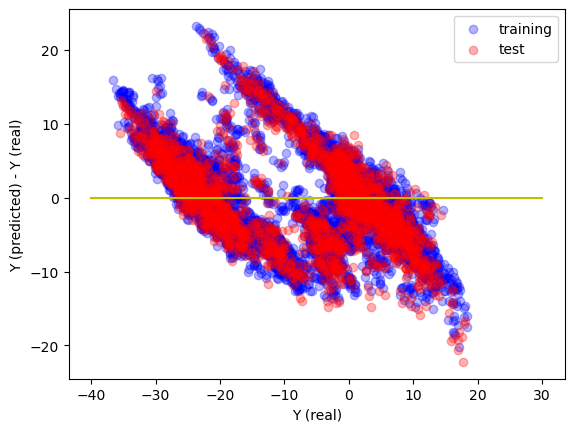

In [8]:
# 90% Information
mu, median, sigma, muv, medianv, sigmav = linear_regression(50, 0.001, X_tr_pca, X_va_pca, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

### Discussion 

- The standard deviation is higher with 90% of the information vs all information (when using the same hyperparameters) 
- There is a lot more overpredicted and underpredicted values with 90% of the information than all information 
- I had to increase the number of iterations before convergence for 90% of the information 

## Comparison of 90%, 80%, and 72% PCA

In [9]:
X_tr_Norm, X_va_Norm, X_tr_pca, X_va_pca, Y_tr, Y_va = split_data(X, Y, pca_comps=0.8)

training set ==  (7231, 15) (7231,) ,, validation set ==  (2411, 15) (2411,)


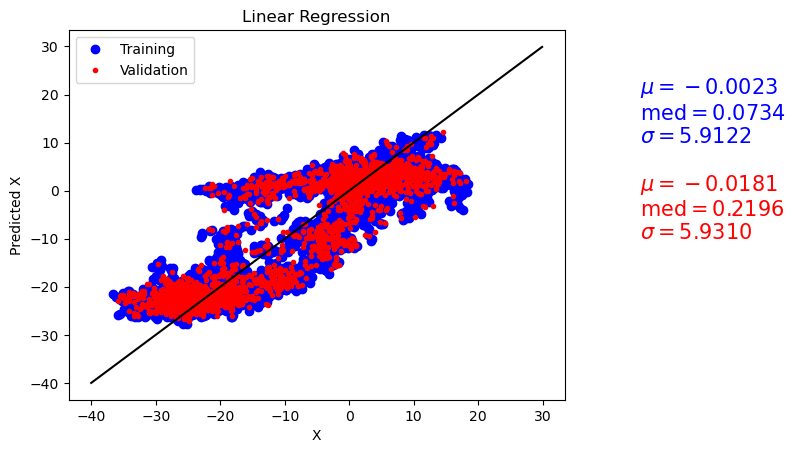

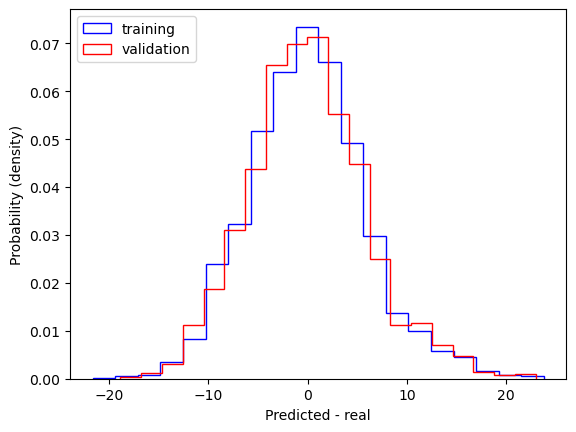

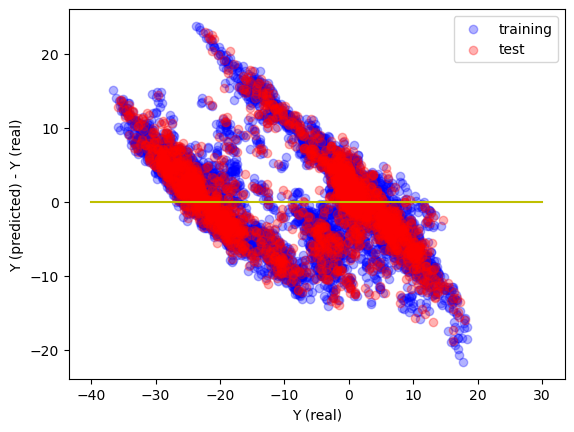

In [10]:
mu, median, sigma, muv, medianv, sigmav = linear_regression(50, 0.001, X_tr_pca, X_va_pca, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

In [11]:
X_tr_Norm, X_va_Norm, X_tr_pca, X_va_pca, Y_tr, Y_va = split_data(X, Y, pca_comps=0.72)

training set ==  (7231, 15) (7231,) ,, validation set ==  (2411, 15) (2411,)


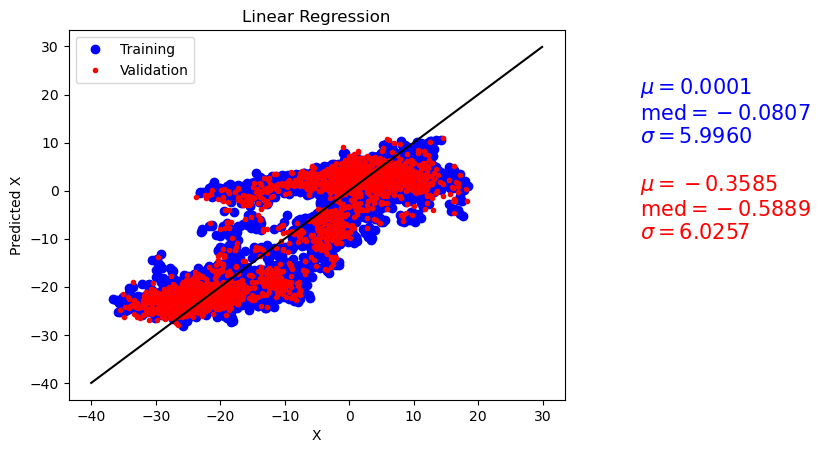

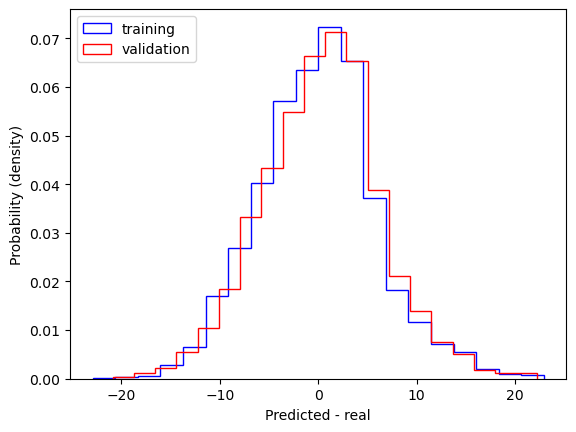

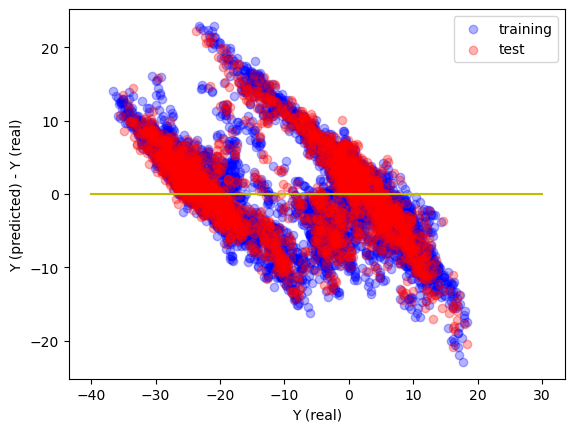

In [12]:
mu, median, sigma, muv, medianv, sigmav = linear_regression(50, 0.001, X_tr_pca, X_va_pca, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

### Discussion

# Sachs Harbour: Nearest Neighbour

## Comparison of 90% Information vs. All Information

In [13]:
X_tr_Norm, X_va_Norm, X_tr_pca, X_va_pca, Y_tr, Y_va = split_data(X, Y, pca_comps=0.9)

training set ==  (7231, 15) (7231,) ,, validation set ==  (2411, 15) (2411,)


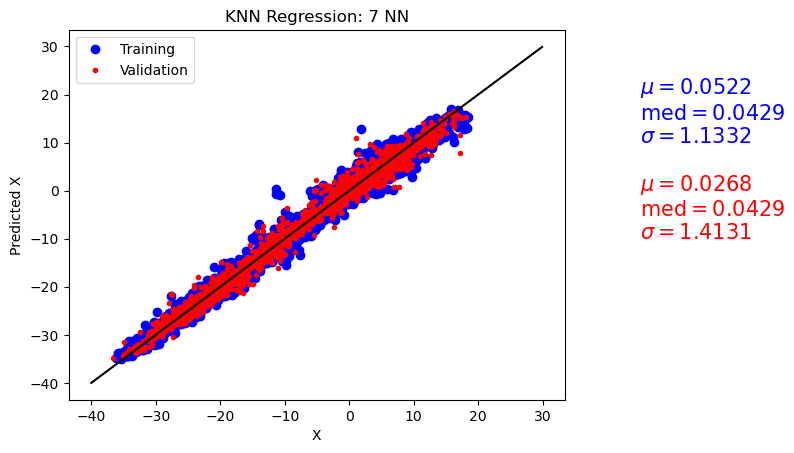

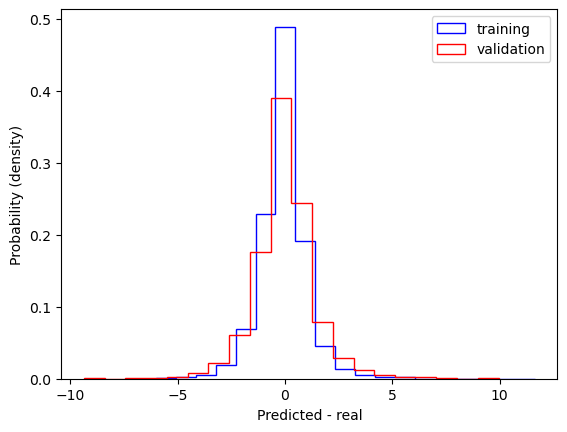

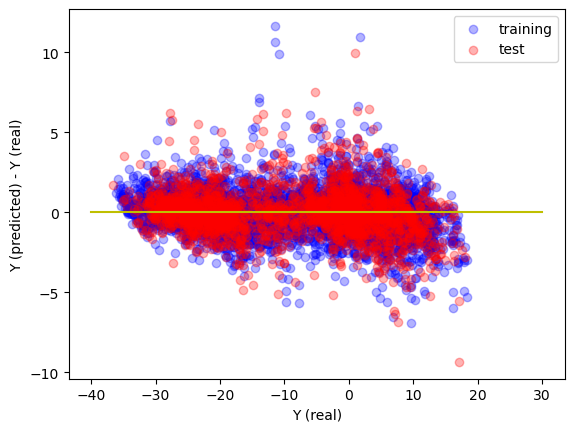

In [14]:
mu, median, sigma, muv, medianv, sigmav = nearest_neighbour(7, X_tr_Norm, X_va_Norm, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

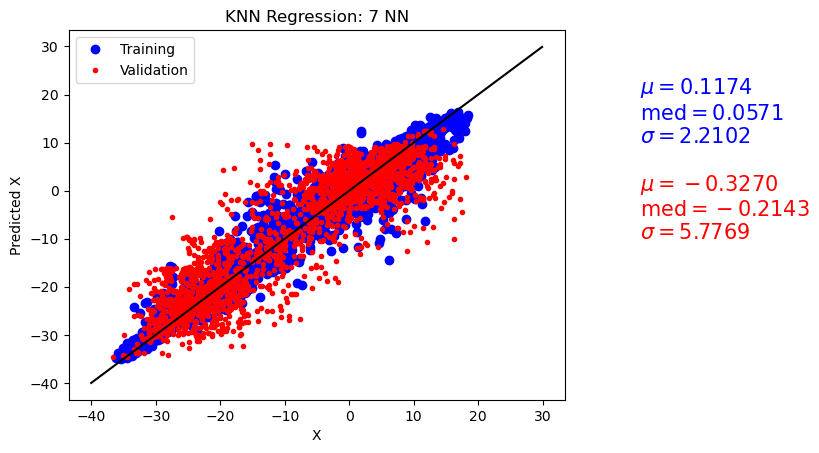

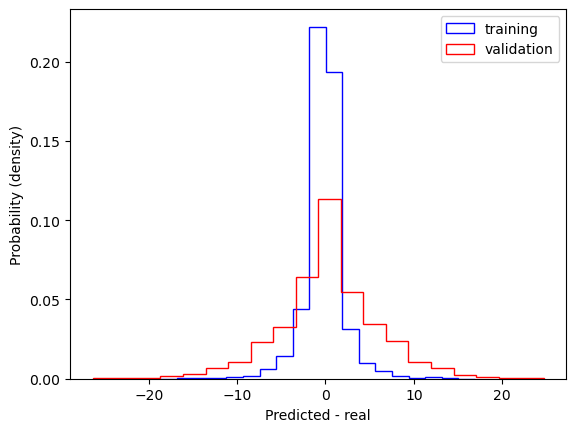

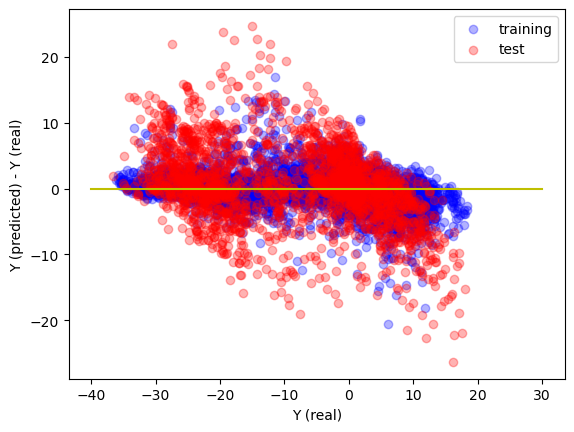

In [15]:
mu, median, sigma, muv, medianv, sigmav = nearest_neighbour(7, X_tr_pca, X_va_pca, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

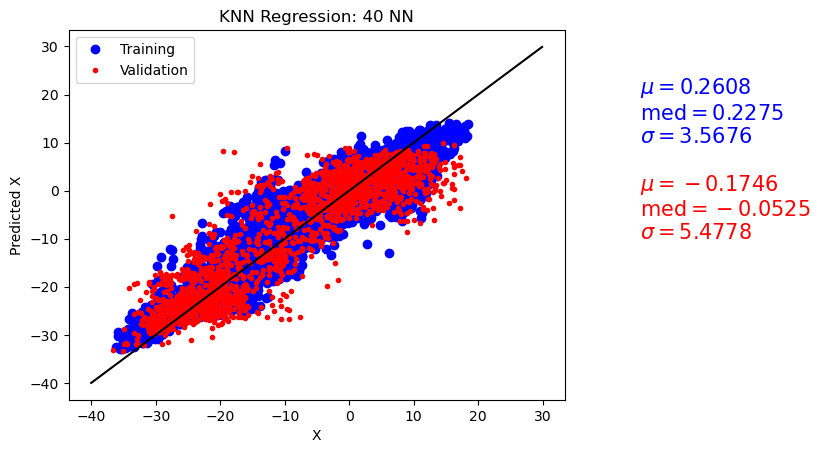

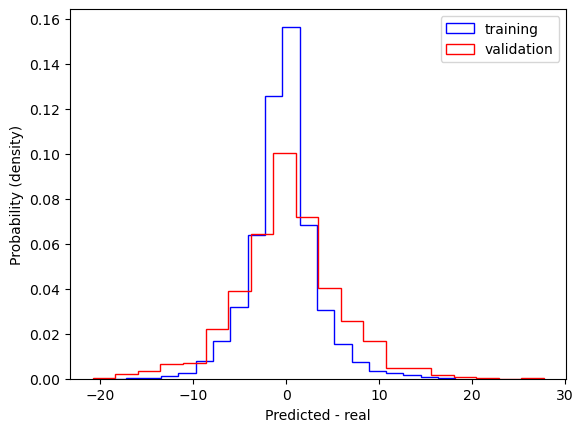

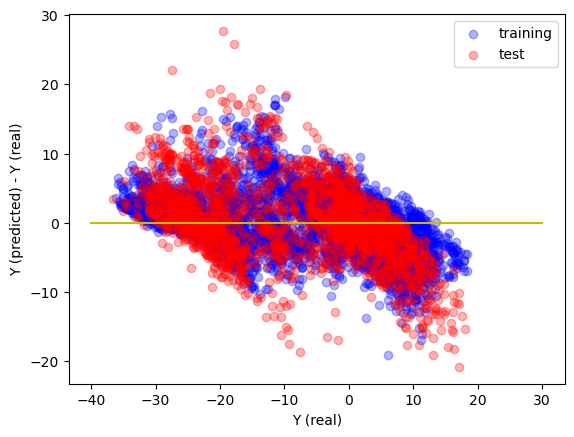

In [16]:
mu, median, sigma, muv, medianv, sigmav = nearest_neighbour(40, X_tr_pca, X_va_pca, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

### Discussion

- For 90% PCA, the standard deviation of the data is much higher than for all of the information 
- I also tried to alter the number of nearest neighbours for the PCA component to see if I could recreate something as good as the all information, and although increasing the number of neighbours helped slightly, it still could not recreate the original results.

## Comparison of 90%, 80%, and 72% PCA

In [17]:
X_tr_Norm, X_va_Norm, X_tr_pca, X_va_pca, Y_tr, Y_va = split_data(X, Y, pca_comps=0.8)

training set ==  (7231, 15) (7231,) ,, validation set ==  (2411, 15) (2411,)


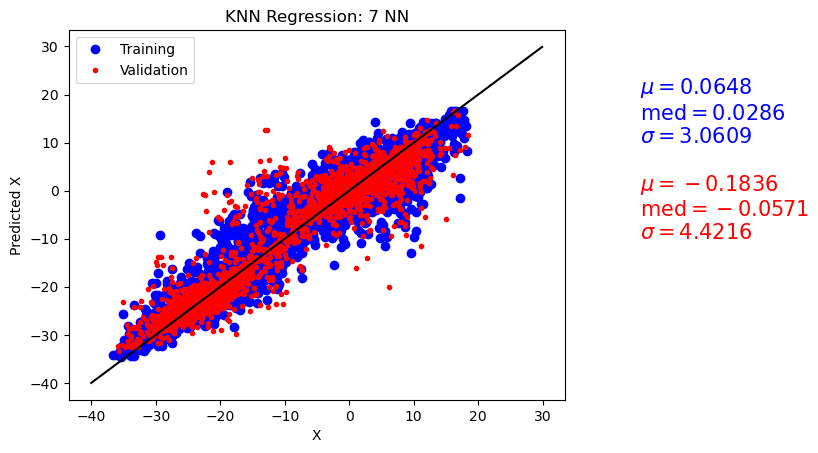

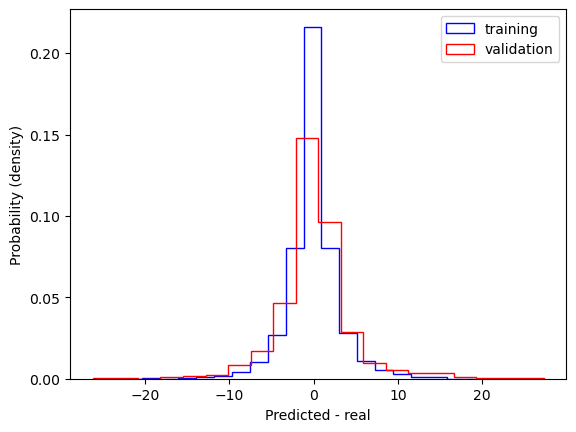

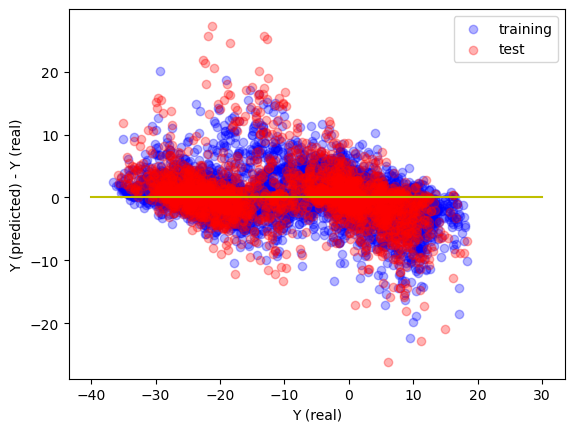

In [18]:
mu, median, sigma, muv, medianv, sigmav = nearest_neighbour(7, X_tr_pca, X_va_pca, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

In [19]:
X_tr_Norm, X_va_Norm, X_tr_pca, X_va_pca, Y_tr, Y_va = split_data(X, Y, pca_comps=0.72)

training set ==  (7231, 15) (7231,) ,, validation set ==  (2411, 15) (2411,)


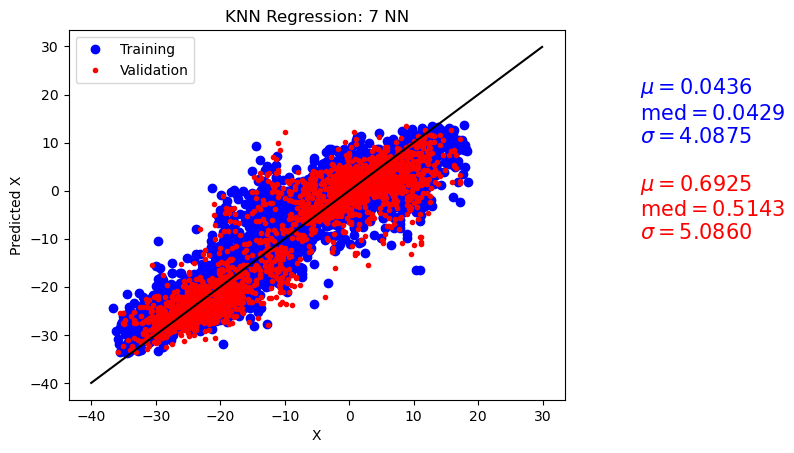

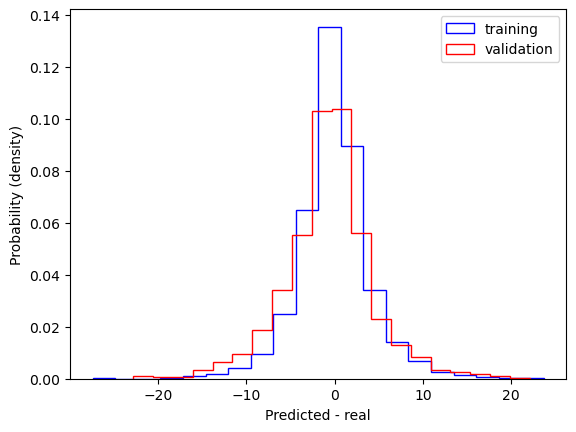

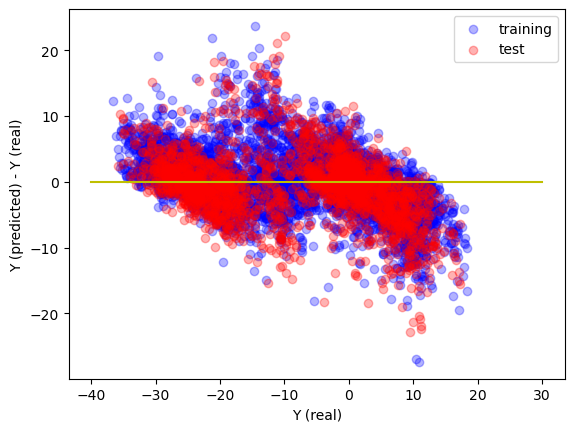

In [20]:
mu, median, sigma, muv, medianv, sigmav = nearest_neighbour(7, X_tr_pca, X_va_pca, Y_tr, Y_va, -40, 30, 45, 10, 45, -10, plot=1)

### Discussion

- As less information is maintained, the model performs worse (higher standard deviation, worse predictions)

# Discussion & Conclusion

- Overall, for both linear regression and KNN, less information lead to worse performance (higher standard deviation, more over/under predictions) 
- KNN still performed better than linear regression in all cases 
- Increasing the number of iterations was necessary for linear regression for less information 
- Increasing the number of nearest neighbours for PCA results did not cause the predictions to reach the accuracy of 100% of the information 


# Appendix: Extra Datasets

## Szeged Data

In [21]:
# Load the data and clean it as was done in q1 and q2
weather = pd.read_csv(r'weatherHistory.csv', delimiter=',')
nan_count = weather.isna().sum().sum()
weather=weather.dropna(axis=0)
weather = weather.drop(['Formatted Date', 'Summary', 'Daily Summary', 'Precip Type', 'Loud Cover', 'Visibility (km)'], axis=1)
weather_mined = weather.loc[ weather['Pressure (millibars)'] != 0]
weather_mined = weather_mined.loc[weather_mined['Humidity'] != 0]

In [22]:
# Split the data, creating a target variable and input variables, and into training and validation sets as was done in question 2
var = ['Temperature (C)']

X = weather_mined.loc[:, weather_mined.columns.drop(var)]
print(X.columns)

Y = weather_mined[var].copy()
print(Y.columns)

Index(['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Pressure (millibars)'],
      dtype='object')
Index(['Temperature (C)'], dtype='object')


In [23]:
X_tr_Norm, X_va_Norm, X_tr_pca, X_va_pca, Y_tr, Y_va = split_data(X, Y, pca_comps=0.9)

training set ==  (70969, 5) (70969,) ,, validation set ==  (23657, 5) (23657,)


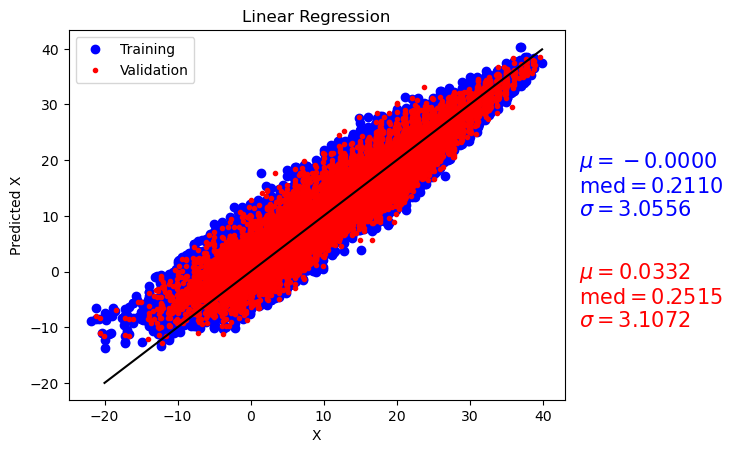

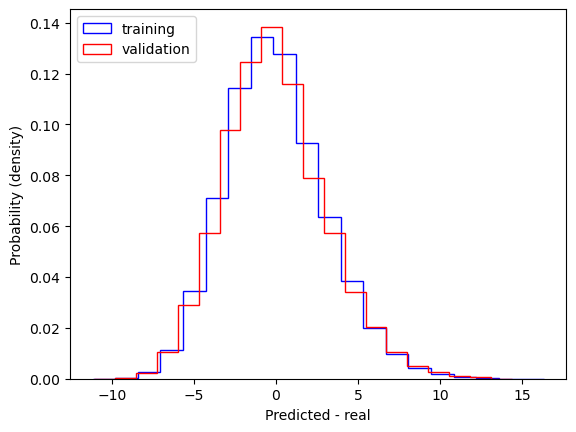

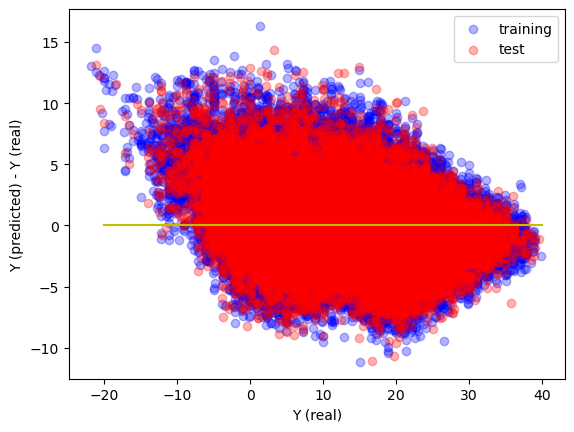

In [24]:
mu, median, sigma, muv, medianv, sigmav = linear_regression(2000, 0.001, X_tr_pca, X_va_pca, Y_tr, Y_va, -20, 40, 45, 10, 45, -10, plot=1)

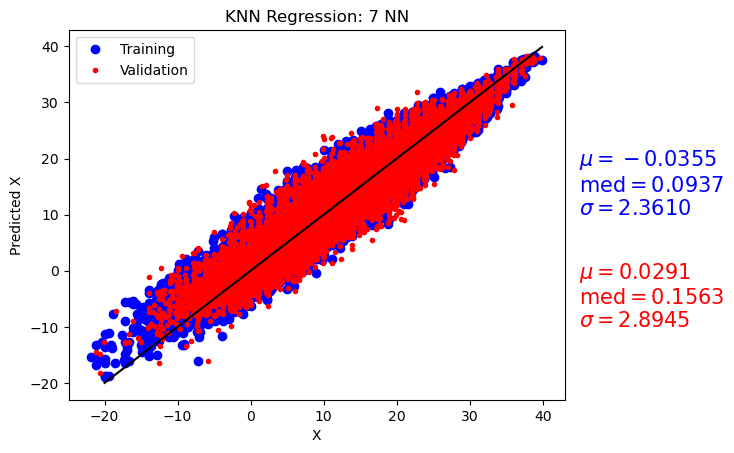

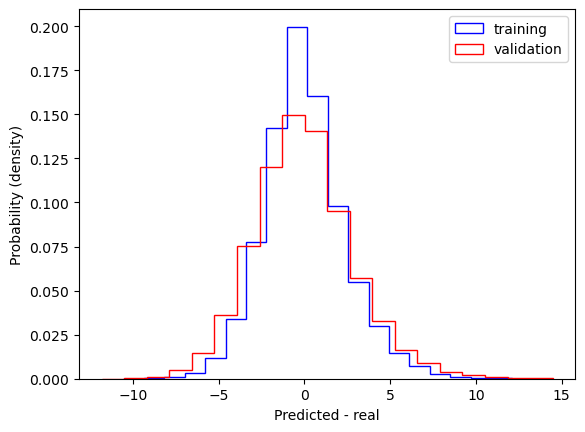

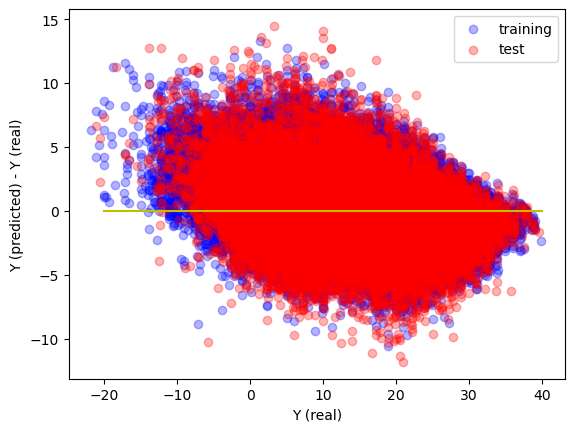

In [25]:
mu, median, sigma, muv, medianv, sigmav = nearest_neighbour(7, X_tr_pca, X_va_pca, Y_tr, Y_va, -20, 40, 45, 10, 45, -10, plot=1)

## Beans

In [26]:
beans = pd.read_excel(r'Dry_Bean_Dataset.xlsx')
beans = beans.drop(['Class'], axis=1)

# Set temperature as the target variable
var = ['Perimeter']

# Drop temperature out of the weather data, and set it as X
X = beans.loc[:, beans.columns.drop(var)]
print(X.columns)

# Set the target (Y) to be temperature
Y = beans[var].copy()
print(Y.columns)


Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
       'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')
Index(['Perimeter'], dtype='object')


In [27]:
X_tr_Norm, X_va_Norm, X_tr_pca, X_va_pca, Y_tr, Y_va = split_data(X, Y, pca_comps=0.9)

training set ==  (10208, 15) (10208,) ,, validation set ==  (3403, 15) (3403,)


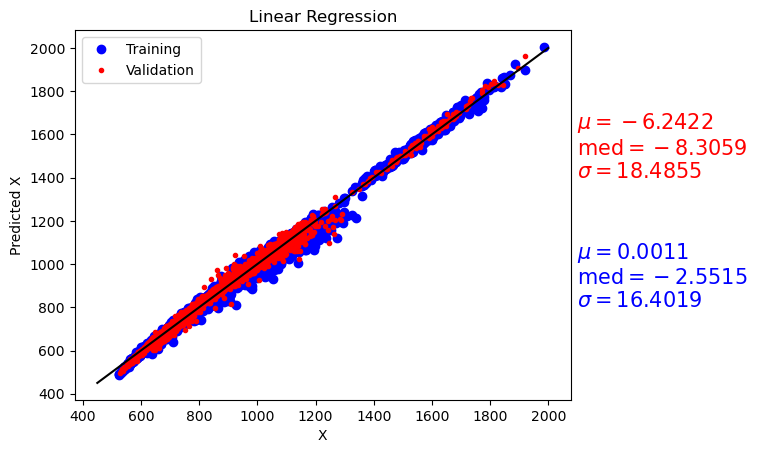

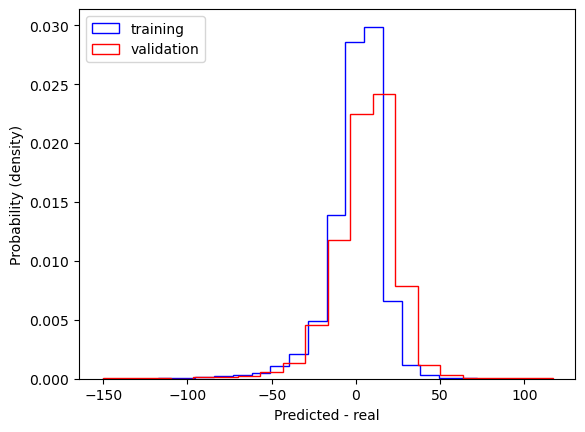

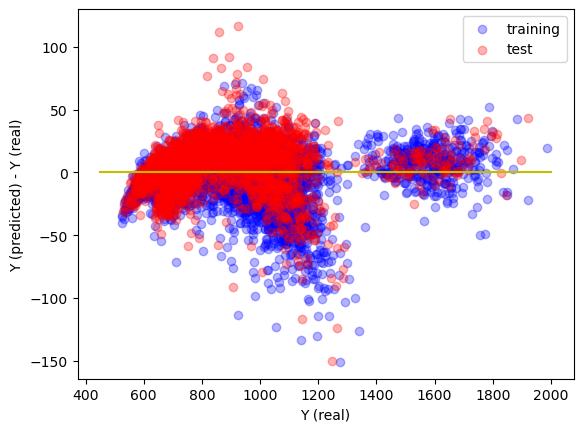

In [28]:
mu, median, sigma, muv, medianv, sigmav = linear_regression(2000, 0.001, X_tr_pca, X_va_pca, Y_tr, Y_va, 450, 2000, 2100, 800, 2100, 1400, plot=1)

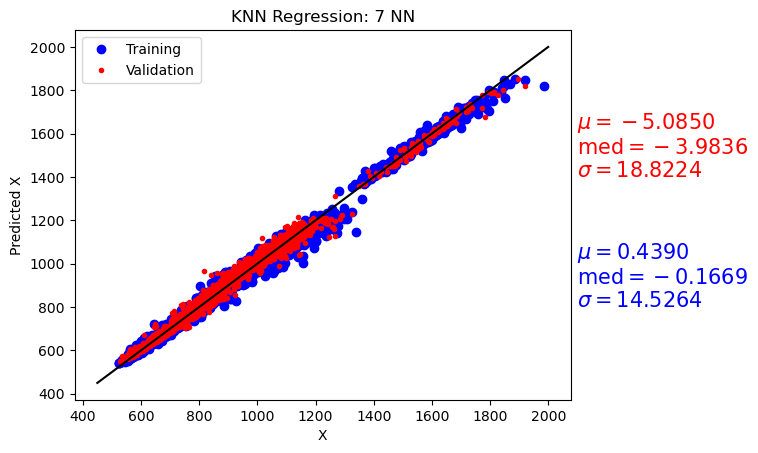

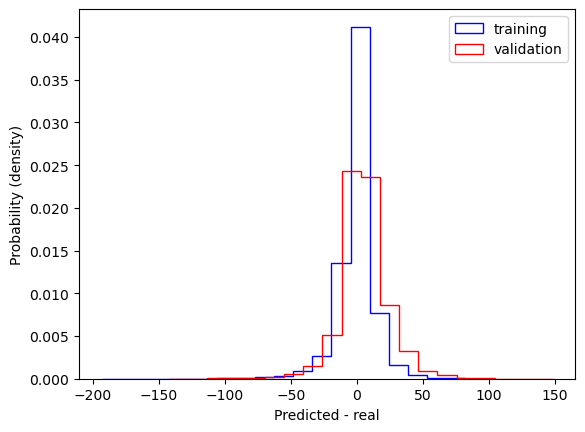

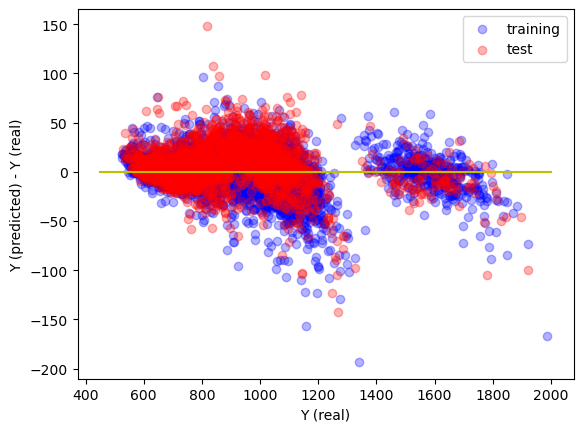

In [29]:
mu, median, sigma, muv, medianv, sigmav = nearest_neighbour(7, X_tr_pca, X_va_pca, Y_tr, Y_va, 450, 2000, 2100, 800, 2100, 1400, plot=1)